In [1]:
from functools import partial, reduce
from itertools import *
import operator

from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

pd.set_option("display.max_rows", 10)

In [2]:
# stolen from https://github.com/data-8/datascience/blob/master/datascience/formats.py


def format_number(value, decimals=2, separator=','):
    if isinstance(value, (int, np.integer)):
        return ('{:' + separator + 'd}').format(value)
    else:
        return ('{:' + separator + '.' + str(decimals) + 'f}').format(value)

In [3]:
sf = pd.read_csv('san_francisco_2015.csv', usecols=(3,11,21))
sf = sf[sf['Total Compensation'] > 10000]
sf[0:3].style.format({"Total Compensation": format_number})

,Organization Group,Job,Total Compensation
0,"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,766.86"
1,"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,209.83"
2,Community Health,Health Care Billing Clerk 2,"110,561.13"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f7cf400>]],
      dtype=object)

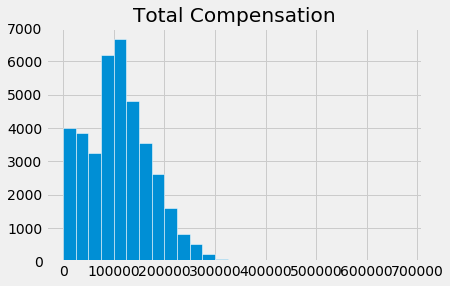

In [4]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, ec='w')

In [7]:
def percentile_amigos(p, a=None):
    if a is None:
        return partial(percentile_amigos, p)
    return (
        percentile(p, a),
        np.median(a),
        np.percentile(a, p))

In [8]:
percentile_amigos(50, sf['Total Compensation'])

(107219.48, 107219.48, 107219.48)

In [9]:
sample_from_population = sf.sample(200, replace=False)
sample_from_population

,Organization Group,Job,Total Compensation
25250,Community Health,Hospital Eligiblity Worker,111966.59
41429,Community Health,Eligibility Worker,105501.27
22033,"Public Works, Transportation & Commerce",Transit Operator,12359.03
19418,General Administration & Finance,Attorney (Civil/Criminal),157211.73
12328,"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng",35525.30
...,...,...,...
33009,Community Health,Medical Records Technician,105685.91
34544,"Public Works, Transportation & Commerce",Assoc Engineer,162265.41
39251,Community Health,Microbiologist,132937.87
35406,Culture & Recreation,Recreation Leader,17110.05


In [10]:
percentile_amigos(50, sample_from_population['Total Compensation'])

(106908.9, 107704.0, 107704.0)

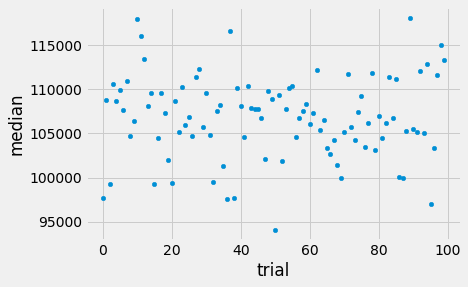

In [11]:
medians = []
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, replace=False)
    median = np.median(sample['Total Compensation'])
    medians.append(median)
    
pd.DataFrame({'trial': repetitions, 'median': medians}).plot.scatter('trial', 'median')

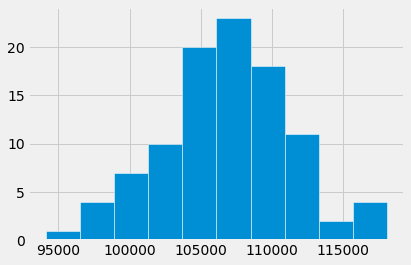

In [12]:
pd.Series(medians).hist(ec="w")

In [13]:
sample_from_population = sf.sample(200, replace=False)
sample_from_population[:3]

,Organization Group,Job,Total Compensation
6419,Community Health,Special Nurse,50109.75
16660,Community Health,Registered Nurse,198921.08
14433,Human Welfare & Neighborhood Development,Public Service Trainee,18021.42


In [14]:
np.median(sample_from_population['Total Compensation'])

107684.13

In [15]:
resample = sample_from_population.sample?

In [ ]:
resample = sample_from_population.sample

In [16]:
resample = sample_from_population.sample(frac=1, replace=True)
resample

,Organization Group,Job,Total Compensation
17510,Human Welfare & Neighborhood Development,Contract Compliance Officer 1,142903.21
40366,"Public Works, Transportation & Commerce",Administrative Analyst,59320.45
36049,Public Protection,"Counselor, Juvenile Hall SFERS",105525.39
25516,General Administration & Finance,Worker's Compensation Adjuster,108060.01
10179,"Public Works, Transportation & Commerce",Electronic Maintenance Tech,186665.12
...,...,...,...
28566,General Administration & Finance,Sr Community Devl Spc 1,136670.79
31050,Human Welfare & Neighborhood Development,Account Clerk,76295.72
30848,"Public Works, Transportation & Commerce","Electrl Trnst Mech, Asst Sprv",148739.86
30878,General Administration & Finance,Custodian,85858.80


In [17]:
np.median(resample['Total Compensation'])

108060.01

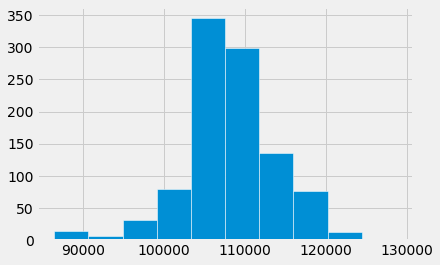

In [18]:
medians = []

for i in np.arange(1000):
    resample = sample_from_population.sample(frac=1, replace=True)
    median = np.median(resample['Total Compensation'])
    medians.append(median)
    
pd.Series(medians).hist(ec='w')

In [19]:
percentile_amigos(2.5, medians)

(96101.215, 107684.13, 96101.215)

In [20]:
percentile_amigos(97.5, medians)

(118594.195, 107684.13, 118595.9915)

In [21]:
percentile_2_5 = []
percentile_97_5 = []

for j in np.arange(100):
    sample_from_population = sf.sample(200, replace=False)
    medians = []
    for i in np.arange(1000):
        resample = sample_from_population.sample(frac=1, replace=True)
        median = np.median(resample['Total Compensation'])
        medians.append(median)
        
    percentile_2_5.append(percentile(2.5, medians))
    percentile_97_5.append(percentile(97.5, medians))
    

In [22]:
truth = np.median(sf['Total Compensation'])
intervals = pd.DataFrame({"Lower": percentile_2_5, "Upper": percentile_97_5})
correct = intervals[(intervals['Lower'] < truth) & (intervals['Upper'] > truth)]
len(correct)

96

In [23]:
intervals[intervals['Lower']>truth]

,Lower,Upper
32,107392.280,131269.615
61,108159.765,121733.770


In [24]:
intervals[intervals['Upper']<truth]

,Lower,Upper
18,87236.810,103898.455
85,91575.805,103900.905
